<a href="https://colab.research.google.com/github/Aashrit77/Python/blob/main/DT_C5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split #the is used to split the data into train and test
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing #this is for normalizing the data/ the label encoder
from sklearn import tree

In [3]:
iris = pd.read_csv("/content/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#variety is in catogorical hence we have to make it numerical using labelencoder
label_encoder = preprocessing.LabelEncoder()
iris["Species"] = label_encoder.fit_transform(iris["variety"])

In [7]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,Species
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [8]:
x = iris.iloc[:,0:4]
y = iris["Species"]

In [9]:
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
iris.Species.unique()

array([0, 1, 2])

In [11]:
iris.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [12]:
#splitting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

# Building a decision tree classifier using entropy criteria

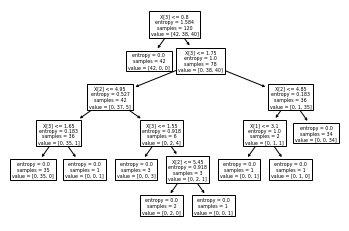

In [24]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=5)
model.fit(x_train,y_train)
tree.plot_tree(model)
plt.show()

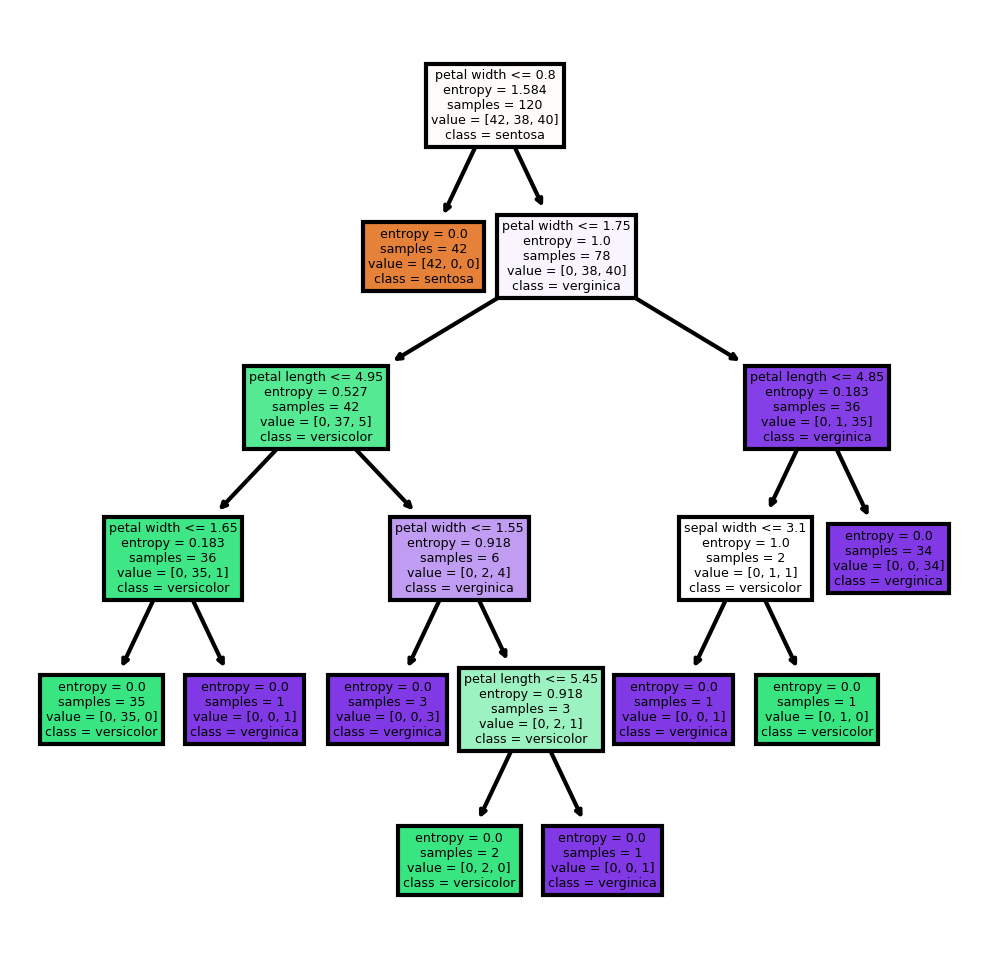

In [25]:
fn = ["sepal length","sepal width","petal length","petal width"]
cn = ["sentosa","versicolor","verginica"]
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi = 300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True)
plt.show()

#Predicting on test data

In [26]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    12
2    10
0     8
dtype: int64

In [27]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [28]:
np.mean(preds==y_test)

1.0

In [29]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10
